In [1]:
import os

In [ ]:
'''
folder_path
    -Flickr8k_Dataset
        -{image_name}.jpg
    -Flickr8k_text
        -Flickr_8k.devImages.txt
        -Flickr_8k.testImages.txt
        -Flickr_8k.trainImages.txt

        -Flickr8k.token.txt
        -Flickr8k.lemma.token.txt
'''

## get images names per train/val/test

In [2]:
current_directory = os.getcwd()
train_path = r'data\Flickr8k_text\Flickr_8k.trainImages.txt'
val_path = r'data\Flickr8k_text\Flickr_8k.devImages.txt'
test_path = r'data\Flickr8k_text\Flickr_8k.testImages.txt'

train_path = os.path.join(current_directory, train_path)
val_path = os.path.join(current_directory, val_path)
test_path = os.path.join(current_directory, test_path)

In [3]:
def get_img_names(path:str)->list:
    with open(path, 'r') as file:
        lines = [line.strip() for line in file.readlines()]
    return lines

In [4]:
train_img_names = get_img_names(train_path)
val_img_names = get_img_names(val_path)
test_img_names = get_img_names(test_path)

print(f'''
train size {len(train_img_names)}
val size {len(val_img_names)}
test size {len(test_img_names)}''')


train size 6000
val size 1000
test size 1000


# get description/captions for images

In [5]:

input_string = "1000268201_693b08cb0e.jpg#0    A child in a pink dress is climbing up a set of stairs in an entry way."

parts = input_string.split('    ') # /t - doesnt work here
print(len(parts))

first_part, second_part = parts[0].split('#')

third_part = parts[1]

# Вывод результатов
print("first part:", first_part)
print("Second part:", second_part)
print("Third part:", third_part)


2
Первая часть: 1000268201_693b08cb0e.jpg
Вторая часть: 0
Третья часть: A child in a pink dress is climbing up a set of stairs in an entry way.


In [10]:
# Flickr8k.lemma.token.txt - the lemmatized version of the Flickr8k.token.txt
descr_path =  os.path.join(current_directory, r'data\Flickr8k_text\Flickr8k.token.txt')


In [74]:
def get_img2discr(path:str, only_lowwer=True)->list:
    img2descr = {}
    with open(path, 'r') as file:
        for line in file.readlines():
            parts = line.split('\t')
            img_name, img_description_id = parts[0].split('#')
            description = parts[1].rstrip().rstrip('.') #[:-3] to cut off \n, dot and " " following by dot
            if only_lowwer:
                description=description.lower()
            #print()
            if img_name not in img2descr.keys():
                img2descr[img_name] = list()
            img2descr[img_name].append(description)
    return img2descr

In [12]:
img2descr = get_img2discr(descr_path)
print(img2descr['1000268201_693b08cb0e.jpg'])
print(f'len of im2descr: {len(img2descr)}')

['A child in a pink dress is climbing up a set of stairs in an entry way ', 'A girl going into a wooden building ', 'A little girl climbing into a wooden playhouse ', 'A little girl climbing the stairs to her playhouse ', 'A little girl in a pink dress going into a wooden cabin ']
len of im2descr: 8092


train size + val size + test size = exactly 8000 not 8092
lets take a look``

In [45]:
def lest_take_a_look_at_92_images():
    img_names_set = set(train_img_names + val_img_names + test_img_names)
    answ = img_names_set.symmetric_difference(set(img2descr.keys()))
    print(answ)
lest_take_a_look_at_92_images()

{'3409947123_a8d07edecf.jpg', '2557972410_6925fe695c.jpg', '3470008804_0ca36a7a09.jpg', '2058091220_2087270068.jpg', '423066487_07757b2b49.jpg', '3295418287_5d590dac43.jpg', '3239866450_3f8cfb0c83.jpg', '3640443200_b8066f37f6.jpg', '2087317114_cf06df5aa5.jpg', '1797554350_20998753c0.jpg', '2973269132_252bfd0160.jpg', '3640109324_3ce89e4d1a.jpg', '2747714500_49476225c6.jpg', '1643915227_9f48068772.jpg', '1155138244_859fd6e079.jpg', '531197115_2be4d5034b.jpg', '3136688093_568b053bdf.jpg', '3551281733_b43bf6f870.jpg', '3274691778_94bb57bba3.jpg', '3086507638_d8a2cd0ac3.jpg', '3561543598_3c1b572f9b.jpg', '394563330_68b566368c.jpg', '843616798_5ab0ecb525.jpg', '199463720_329a802206.jpg', '3430782104_34da558eba.jpg', '3434526008_02359881a0.jpg', '61209225_8512e1dad5.jpg', '2582390123_71120edb0c.jpg', '3591461782_687e320042.jpg', '3246804978_ea2c9e56f2.jpg', '3525453732_f74a38f111.jpg', '2792195540_af5fb95caa.jpg', '3491607076_922ec561d9.jpg', '1479857177_9d4a6f38fd.jpg', '2895966469_53e0b292

lets count unique tokens in Flickr8k.token.txt and Flickr8k.lemma.token.txt

In [32]:
token_set = []
for sentences in img2descr.values():
    for sentence in sentences: 
        token_set.extend(sentence.split())
token_set = set(token_set)
print(f'Flickr8k.token.txt has {len(token_set)} unique words')
print(list(token_set)[:10])

Flickr8k.token.txt has 9630 unique words
['multicolored', 'Roman', 'trots', 'lunchbox', 'Ghostbusters', 'maintain', 'composure', 'mandolin', 'viz', 'duke']


In [80]:
import torch

In [81]:
t = torch.tensor([6778, 6683, 6780, 3366, 3094, 5577, 1730, 6780, 6780, 6780, 3094, 6780,
        6780, 1730, 6780, 6780,  262, 3094, 5538, 6780,  262,  217, 6780, 6780,
        3094, 5577, 6780, 6780, 3094, 3094, 6780,  262, 6780, 6683, 6780, 6780,
        6683, 6780, 6780, 6683, 6780, 6780, 6780, 6780, 6780,  217, 6780, 2766,
        6780, 6683, 5538, 6780, 5577, 3251, 6780, 6780, 6780, 6780, 6780, 6683,
        6780, 6683, 5538, 6780, 6780, 6780, 6683, 6780, 6780, 6780, 6779])

In [75]:
# Flickr8k.lemma.token.txt - the lemmatized version of the Flickr8k.token.txt
descr_lemma_path =  os.path.join(current_directory, r'data\Flickr8k_text\Flickr8k.lemma.token.txt')
img2descr_lemma = get_img2discr(descr_lemma_path)

token_set = []
for sentences in img2descr_lemma.values():
    for sentence in sentences: 
        token_set.extend(sentence.split())
token_set = set(token_set)
print(f'Flickr8k.lemma.token.txt has {len(token_set)} unique words')
print(list(token_set)[:10])

Flickr8k.lemma.token.txt has 6778 unique words
['multicolored', 'lunchbox', 'diploma', 'maintain', 'composure', 'mandolin', 'viz', 'duke', 'colander', 'exit']


In [ ]:
# for lemma.token I want to 

Flickr8k.token.txt       has 9630 unique words  
Flickr8k.lemma.token.txt has 7405 unique words without lowwer  
Flickr8k.lemma.token.txt has 6778 unique words with lowwer

lets create a dataset

In [35]:
from typing import Any
from PIL import Image
import os
from torch.utils.data import Dataset
from torchvision import transforms
import matplotlib.pyplot as plt

In [62]:
class FlickerDS(Dataset):
    def __init__(self, img_folder_path, img2descr, img_names, img_size, transform=None):
        self.img_folder_path = img_folder_path
        self.img2descr = img2descr
        self.img_names = img_names

        self.img_size = img_size

        if transform is None:
            transform = transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5],), 
                            transforms.Resize(self.img_size, antialias=True)
                        ])
        self.transform = transform

    
    def __len__(self):
        return len(self.img_names)
    
    def __getitem__(self, indx):

        decription_list = self.img2descr[self.img_names[indx]]
        img_full_path =  os.path.join(self.img_folder_path, self.img_names[indx])
        img = self.transform(Image.open(img_full_path).convert("RGB"))
        return img, decription_list
    
        

In [56]:
def show_single_img(img):
    plt.figure(figsize=(12, 6))

    mean = std = 0.5
    img = (img  * std) + mean

    plt.imshow(img.permute(1, 2, 0))
    plt.show()

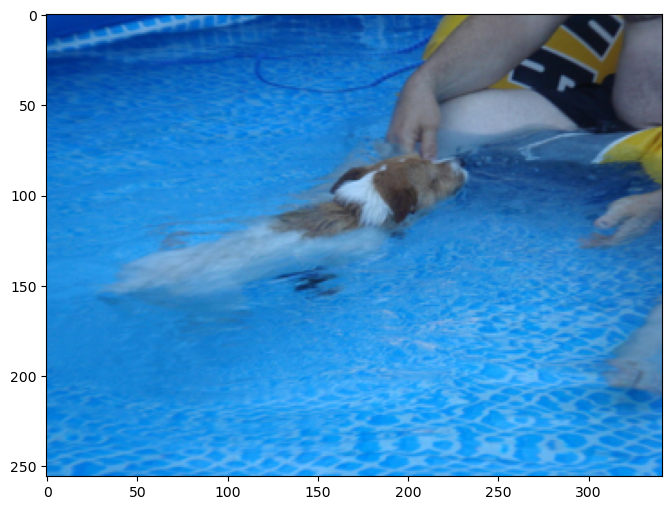

a brown and white dog swimming towards some in the pool
A dog in a swimming pool swims toward sombody we cannot see 
A dog swims in a pool near a person 
Small dog is paddling through the water in a pool 
The small brown and white dog is in the pool 


In [69]:
import random
def test_dataset():
    ds = FlickerDS(img_folder_path='data\Flickr8k_Dataset\Flicker8k_Dataset',
                   img2descr=img2descr,
                   img_names=test_img_names,
                   img_size = 256)
    img, descr = ds[random.randint(0, 5)]
    show_single_img(img)
    print(*descr,sep='\n' )
    '''for img, descr in ds:
        show_single_img(img)
        print(*descr,sep='\n' )
        break'''
test_dataset()

lets test lemma.token

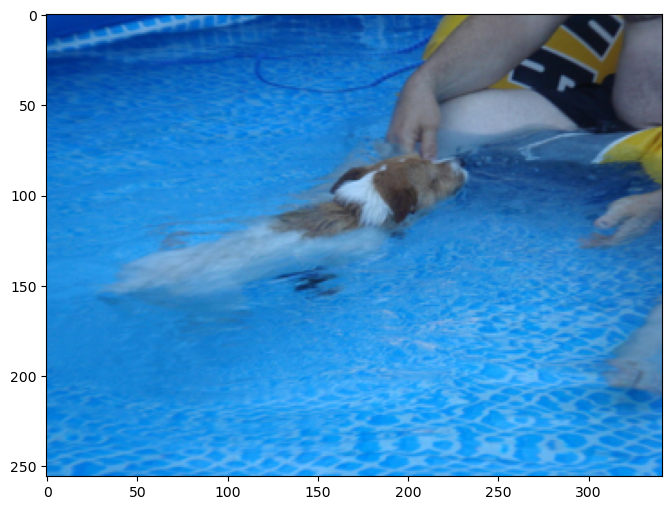

a brown and white dog swim towards some in a pool
a dog in a swim pool swim toward sombody we cannot see 
a dog swim in a pool near a person 
small dog be paddle through the water in a pool 
a small brown and white dog be in a pool 


In [86]:
def test_dataset2():
    ds = FlickerDS(img_folder_path='data\Flickr8k_Dataset\Flicker8k_Dataset',
                   img2descr=img2descr_lemma,
                   img_names=test_img_names,
                   img_size = 256)
    img, descr = ds[random.randint(0, 5)]
    show_single_img(img)
    print(*descr,sep='\n' )
    '''for img, descr in ds:
        show_single_img(img)
        print(*descr,sep='\n' )
        break'''
test_dataset2()

how many records/captions are there per image

In [90]:
max_len = -1
min_len = 13 # i know that 5 is max min
sum_len = 0
for img, descr in img2descr_lemma.items():
    local_len = len(descr)
    if local_len > max_len:
        max_len = local_len
    if local_len < min_len:
        min_len = local_len
    sum_len += local_len
print(f'max description amount: {max_len}')
print(f'min description amount: {min_len}')
print(f'avg description amount: {sum_len/len(img2descr_lemma)}') 

max description amount: 5
min description amount: 5
avg description amount: 5.0


In [91]:
max_len = -1
min_len = 13 # i know that 5 is max min
sum_len = 0
for img, descr in img2descr.items():
    local_len = len(descr)
    if local_len > max_len:
        max_len = local_len
    if local_len < min_len:
        min_len = local_len
    sum_len += local_len
print(f'max description amount: {max_len}')
print(f'min description amount: {min_len}')
print(f'avg description amount: {sum_len/len(img2descr)}') 

max description amount: 5
min description amount: 5
avg description amount: 5.0


all images in both files have exactly five descriptions

Tokenize

In [52]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")


In [45]:
input_text = "Hello world"
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Print the resulting tokens
print("Tokenized input IDs:", input_ids)
print('GPT-2 vocab size:', tokenizer.vocab_size)

Tokenized input IDs: tensor([[15496,   995]])
GPT-2 vocab size: 50257


my tokenizer

In [1]:
assert 11 == 12, 'Error'

AssertionError: Error

In [76]:
class MyTokenizer:
    def __init__(self, img2descr, bos = '<bos>', eos = '<eos>', unk = '<unk>', pad = '<pad>'):
        unique_words = []
        for sentences in img2descr.values():
            for sentence in sentences: 
                unique_words.extend(sentence.split())
        unique_words = list(set(unique_words))
        unique_words += [bos, eos, unk, pad]
        self.word2token = {}
        self.token2word = {}
        for i, word in enumerate(unique_words):
            self.word2token[word] = i
            self.token2word[i] = word

        self.unk_idx = self.word2token[unk]
        self.bos_idx = self.word2token[bos]
        self.eos_idx = self.word2token[eos]
        self.pad_idx = self.word2token[pad]

    
    def encode(self, sentence):
        '''encode sentences batch'''
        tokenized = []*len(sentence)
        for i, word in enumerate(sentence):
            if word in self.word2token.keys():
                tokenized[i] = self.word2token[word]
            else:
                tokenized[i] = self.unk_idx
        return [self.bos_idx] + tokenized + [self.eos_idx]
    
    def decode(self, tokens):
        words = []
        for token in tokens:
            words.append(self.token2word[token])
        return words
    
    def beauty_decode(self, tokens):
        tokens = [token for token in tokens if token not in [self.unk_idx, self.bos_idx, self.eos_idx, self.pad_idx]]
        words = []
        for token in tokens:
            words.append(self.token2word[token])
        return words

It is time to make separate file

Positional encodeing test

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=512):
        super(PositionalEncoding, self).__init__()
        self.encoding = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(torch.log(torch.tensor(10000.0)) / d_model))
        self.encoding[:, 0::2] = torch.sin(position * div_term)
        self.encoding[:, 1::2] = torch.cos(position * div_term)
        self.encoding = self.encoding.unsqueeze(0)

    def forward(self, x):
        return x + self.encoding[:, :x.size(1)].detach()


In [5]:
d_model = 256
max_len = 100
positional_encoding = PositionalEncoding(d_model, max_len=max_len)

In [11]:
sequence = torch.randn(4, 10, d_model)

# Apply positional encoding
output = positional_encoding(sequence)
print(output.shape)

torch.Size([4, 10, 256])


In [1]:
for i in range(-112):
    print('t')

In [14]:
a = torch.zeros(16, 2, 3)
b = torch.ones(16, 3) + torch.arange(16).unsqueeze(dim=1)
print(a.shape)
print(b.shape)
#print(b)

c = a + b.unsqueeze(dim=1)

print(c.shape)
print(c[:, 1, :])

torch.Size([16, 2, 3])
torch.Size([16, 3])
torch.Size([16, 2, 3])
tensor([[ 1.,  1.,  1.],
        [ 2.,  2.,  2.],
        [ 3.,  3.,  3.],
        [ 4.,  4.,  4.],
        [ 5.,  5.,  5.],
        [ 6.,  6.,  6.],
        [ 7.,  7.,  7.],
        [ 8.,  8.,  8.],
        [ 9.,  9.,  9.],
        [10., 10., 10.],
        [11., 11., 11.],
        [12., 12., 12.],
        [13., 13., 13.],
        [14., 14., 14.],
        [15., 15., 15.],
        [16., 16., 16.]])


In [13]:
from torchtext.data.metrics import bleu_score
candidate_corpus = [['My', 'full', 'pytorch', 'test'],
                    ['Another', 'Sentence']]
references_corpus = [[['My', 'full', 'pytorch', 'test'], ['Completely', 'Different']],
                     [['No', 'Match']]]
bleu_sc = bleu_score(candidate_corpus, references_corpus)
print(bleu_sc)

0.8408964276313782


In [14]:
candidate_corpus = [['My', 'full', 'pytorch', 'test'],
                    ['Another', 'Sentence']]
references_corpus = [[['My', 'full', 'pytorch', 'test'], ['Completely', 'Different']],
                     [['Another', 'Sentence']]]
bleu_sc = bleu_score(candidate_corpus, references_corpus)
print(bleu_sc)

1.0


In [1]:
import torch
print(torch.cuda.is_available())

True


In [2]:
!conda install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia


^C


In [9]:
loss = nn.CrossEntropyLoss(ignore_index=4)
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
output.backward()

print(f'in type: {input.dtype}')
print(f'in shape: {input.shape}')
print(f'target type: {target.dtype}')
print(f'target shape: {target.shape}')

in type: torch.float32
in shape: torch.Size([3, 5])
target type: torch.int64
target shape: torch.Size([3])


In [19]:
loss = nn.CrossEntropyLoss(ignore_index=4)
input = torch.randn((2, 22, 6782), requires_grad=True).view(2*22, -1)
target = torch.empty((2, 22), dtype=torch.long).random_(5).view(22*2)

print(f'in type: {input.dtype}')
print(f'in shape: {input.shape}')
print(f'target type: {target.dtype}')
print(f'target shape: {target.shape}')

output = loss(input, target)
print(output)


in type: torch.float32
in shape: torch.Size([44, 6782])
target type: torch.int64
target shape: torch.Size([44])
tensor(8.9095, grad_fn=<NllLossBackward0>)


In [12]:
import torch
import torch.nn as nn

# Предположим, у вас есть выход модели (logits) и метки классов y
logits = torch.randn(2, 3, 5)  # Пример выхода модели (batch_size=2, sequence_len=3, num_classes=5)
y = torch.tensor([[1, 0, 2], [2, 1, 0]])  # Пример меток классов (batch_size=2, sequence_len=3)

# Изменение размерностей для использования nn.CrossEntropyLoss
logits_flat = logits.view(-1, logits.size(-1))  # (batch_size * sequence_len, num_classes)
y_flat = y.view(-1)  # (batch_size * sequence_len)

# Создание экземпляра CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

# Рассчет потерь
loss = criterion(logits_flat, y_flat)

print("Потери:", loss.item())


Потери: 1.8614813089370728


In [1]:
best_test_loss = float('+inf')
print(best_test_loss)

inf


In [4]:
from datetime import datetime

current_date_and_time = datetime.now()
formatted_string = current_date_and_time.strftime('%m_%d_%H')

print(formatted_string)

01 11 15


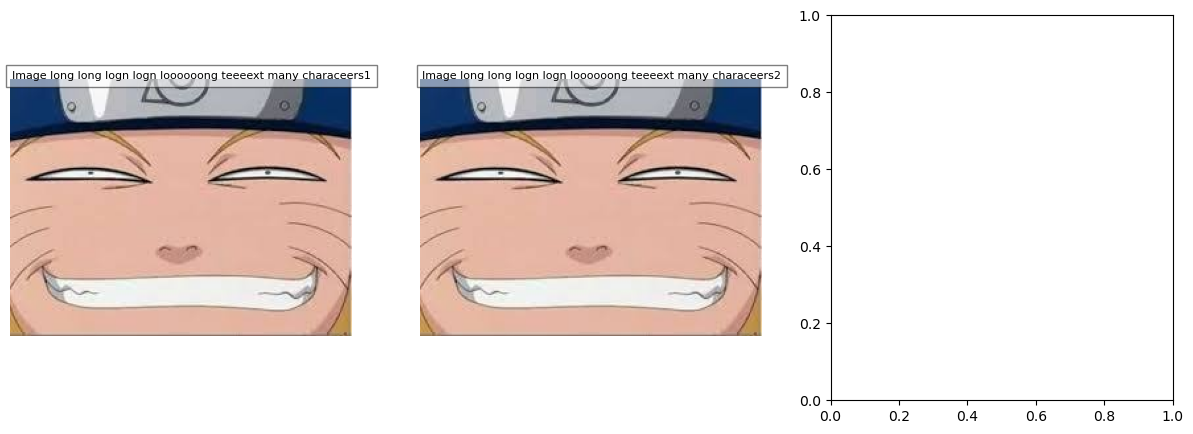

In [19]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Создание пустой фигуры с тремя подграфиками
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Пути к изображениям
image_paths = [r'C:\Users\Bogdan\Pictures\images.jpg', r'C:\Users\Bogdan\Pictures\images.jpg']

# Загрузка изображений и добавление их к подграфикам
for i, image_path in enumerate(image_paths):
    img = Image.open(image_path).convert("RGB")
    axs[i].imshow(img)
    
    # Добавление надписи под изображением
    text = f'Image long long logn logn loooooong teeeext many characeers{i + 1}'
    axs[i].text(1, 1, text, fontsize=8, bbox=dict(facecolor='white', alpha=0.5), ha="left", va="bottom")
    axs[i].axis('off')

plt.show()

In [ ]:
@torch.no_grad()
def img_and_descr(model, dataset, tokenizer, n_imgs = 2):
    fig, axs = plt.subplots(1, n_imgs, figsize=(15, 5))
    std = mean = 0.5
    
    for img, true_descr in enumerate(dataset):
        if i > n_imgs:
            break
        # feed img into model here
        img = img*std + mean
        img = img.cpu()
        true_descr = ' '.join(tokenizer.decode(true_descr))

        axs[i].imshow(img)
        axs[i].text(1, 1, descr, fontsize=8, bbox=dict(facecolor='white', alpha=0.5), ha="left", va="bottom")
        axs[i].axis('off')

    plt.show()

In [4]:
import torch 
a = torch.full((5, 1), 33).unsqueeze(0)
print(a.shape)

torch.Size([1, 5, 1])


In [7]:
b = torch.tensor([[1, 2, 3, 4], [4, 3, 2, 1]]).unsqueeze(0)
print(b.argmax(dim=2))

tensor([[3, 0]])


In [ ]:
[['a', 'child', 'and', 'her', 'mother', 'be', 'play', 'ball', 'in', 'a', 'park', '<eos>'], ['a', 'girl', 'be', 'shake', '<eos>']]
 [['a', 'child', 'and', 'her', 'mother', 'be', 'play', 'ball', 'in', 'a', 'park', '<eos>'], ['a', 'girl', 'be', 'shake', 'the', 'water', 'out', 'of', 'her', 'hair', '<eos>']]

In [2]:
#real axamples of model output and gt
from torchtext.data.metrics import bleu_score
candidate_corpus = [['a', 'child', 'and', 'her', 'mother', 'be', 'play', 'ball', 'in', 'a', 'park', '<eos>'],
                    ['a', 'girl', 'be', 'shake', '<eos>']]

references_corpus =  [[['a', 'child', 'and', 'her', 'mother', 'be', 'play', 'ball', 'in', 'a', 'park', '<eos>']],
                      [['a', 'girl', 'be', 'shake', 'the', 'water', 'out', 'of', 'her', 'hair', '<eos>']]]
bleu_sc = bleu_score(candidate_corpus, references_corpus)
print(bleu_sc)

0.6609827234962141


In [ ]:
from torch.utils.tensorboard import SummaryWriter